In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML # mljar-supervised

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score

In [4]:
data = pd.read_csv('adult-income.csv')

In [8]:
data.isna().sum(axis=1).sum(axis=0)

6465

braki danych to są oznaczone '?'

In [6]:
np.where(data == '?')

(array([    4,     4,     6, ..., 48822, 48823, 48823]),
 array([1, 6, 1, ..., 6, 1, 6]))

In [7]:
data.replace(['?'], np.nan, inplace=True)

In [14]:
np.where(data == '?')

(array([], dtype=int64), array([], dtype=int64))

In [9]:
data

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18           NaN  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                NaN    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

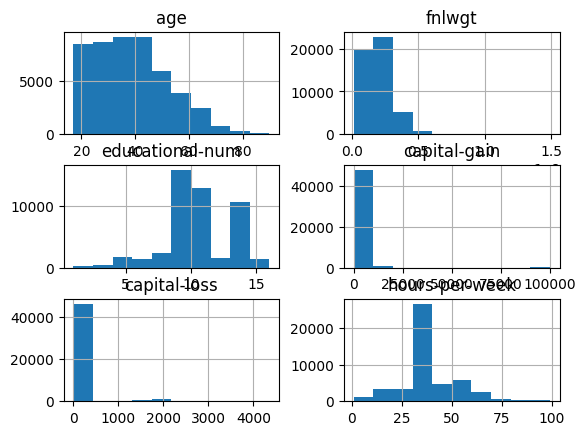

In [10]:
data.hist()

In [11]:
sum(data.income == '<=50K.')

0

In [12]:
X = data.drop('income', axis = 1)

In [13]:
y = data.income

In [14]:
sum(y == '>50K')

11687

In [15]:
sum(y == '<=50K')

37155

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

NameError: name 'train_test_split' is not defined

In [17]:
automl1 = AutoML(mode="Explain",algorithms=['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors'])
automl1.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_3
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.55101 trained in 0.2 seconds
2_DecisionTree logloss 0.369518 trained in 6.69 seconds
* Step default_algorithms will try to check up to 7 models
3_Default_LightGBM logloss 0.272467 trained in 4.02 seconds
4_Default_Xgboost logloss 0.270418 trained in 1.94 seconds
5_Default_CatBoost logloss 0.271458 trained in 6.57 seconds
6_Default_NeuralNetwork logloss 0.327859 trained in 4.18 seconds
7_Default_RandomForest logloss 0.338811 trained in 4.45 seconds
8_Default_ExtraTrees logloss 0.369955 trained in 2.73 seconds
'KNeighborsA

AutoML(algorithms=['Baseline', 'Linear', 'Decision Tree', 'Random Forest',
                   'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost',
                   'Neural Network', 'Nearest Neighbors'])

In [18]:
y_pred = automl1.predict(X_test)

In [19]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [20]:
print("accuracy: %0.3f" % (accuracy_score(y_test, y_pred)))
print("recall: %0.3f" % (recall_score(y_test, y_pred, pos_label='<=50K')))
print("precision: %0.3f" % (precision_score(y_test, y_pred, pos_label='<=50K')))
# print("auc: %0.3f" % roc_auc_score(y_test, y_pred))

accuracy: 0.870
recall: 0.941
precision: 0.895


In [21]:
automl1.report()

In [29]:
bm = automl1._best_model
print(bm)

None


In [ ]:
automl2 = AutoML(mode="Perform", algorithms=['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors'])
automl2.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_2
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
* Step simple_algorithms will try to check up to 4 models
1_Baseline logloss 0.551068 trained in 1.36 seconds (1-sample predict time 0.0043 seconds)
2_DecisionTree logloss 0.370039 trained in 13.95 seconds (1-sample predict time 0.0119 seconds)
3_DecisionTree logloss 0.353708 trained in 11.51 seconds (1-sample predict time 0.017 seconds)
4_DecisionTree logloss 0.353708 trained in 11.78 seconds (1-sample predict time 0.0147 seconds)
* Step default_algorithms will try to check up t

AutoML(algorithms=['Baseline', 'Linear', 'Decision Tree', 'Random Forest',
                   'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost',
                   'Neural Network', 'Nearest Neighbors'],
       mode='Perform')

In [1]:
automl1.predict(X_test)

NameError: name 'automl1' is not defined